In [394]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [395]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [396]:
print(f"train shape {df.shape}")
print(f"test shape {test.shape}")


train shape (2059, 9)
test shape (1374, 8)


In [397]:
df

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


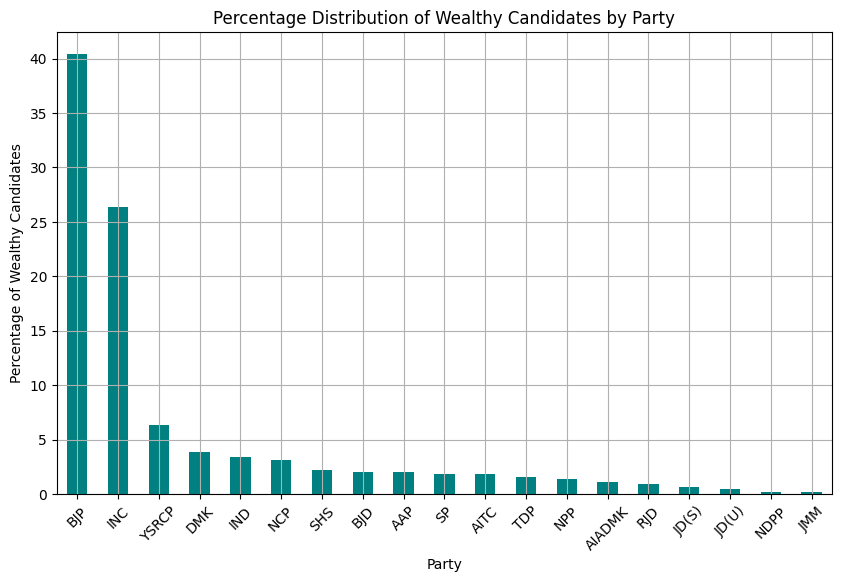

In [398]:
def parse_assets(asset_str):
    asset_str = asset_str.lower().replace('+', '')
    if 'crore' in asset_str:
        return float(asset_str.replace('crore', '')) * 100  
    elif 'lac' in asset_str:
        return float(asset_str.replace('lac', ''))
    else:
        return 0
df['assets_lakhs'] = df['Total Assets'].apply(parse_assets)

threshold = df['assets_lakhs'].quantile(0.8)  
wealthy_df = df[df['assets_lakhs'] >= threshold]


wealthy_count = wealthy_df['Party'].value_counts()
total_wealthy = wealthy_count.sum()


percent_distribution = (wealthy_count / total_wealthy) * 100

plt.figure(figsize=(10, 6))
percent_distribution.plot(kind='bar', color='teal')
plt.title('Percentage Distribution of Wealthy Candidates by Party')
plt.xlabel('Party')
plt.ylabel('Percentage of Wealthy Candidates')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

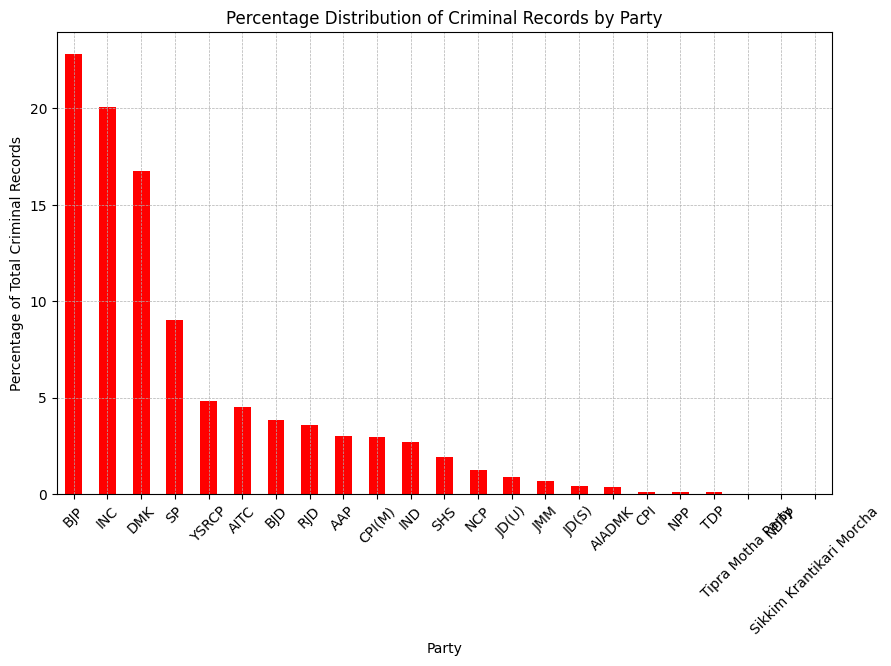

In [399]:

total_criminal_records_by_party = df.groupby('Party')['Criminal Case'].sum()

total_criminal_records = total_criminal_records_by_party.sum()

percentage_distribution = (total_criminal_records_by_party / total_criminal_records) * 100


percentage_distribution = percentage_distribution.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
percentage_distribution.plot(kind='bar', color='red')
plt.title('Percentage Distribution of Criminal Records by Party')
plt.xlabel('Party')
plt.ylabel('Percentage of Total Criminal Records')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

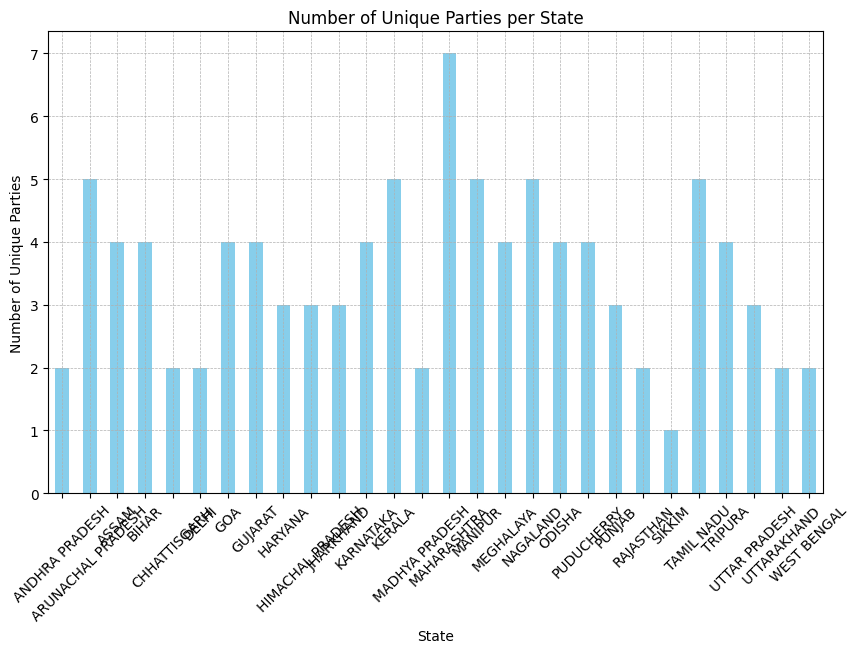

In [400]:
unique_parties_per_state = df.groupby('state')['Party'].nunique()

# Plotting
plt.figure(figsize=(10, 6))
unique_parties_per_state.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Parties per State')
plt.xlabel('State')
plt.ylabel('Number of Unique Parties')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


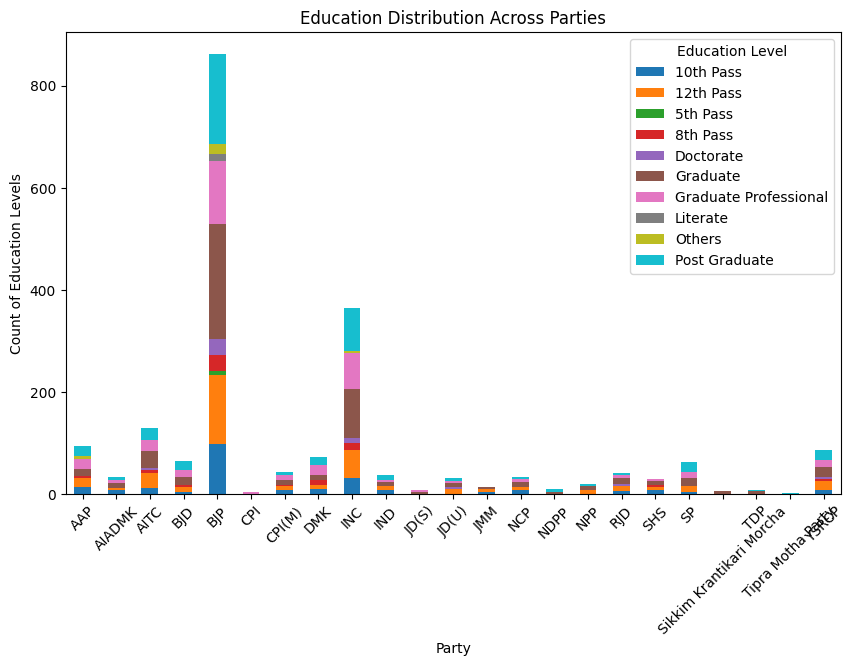

In [401]:
education_party_distribution = pd.crosstab(df['Party'], df['Education'])

# Plotting as a stacked bar chart
education_party_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Distribution Across Parties')
plt.xlabel('Party')
plt.ylabel('Count of Education Levels')
plt.xticks(rotation=45)  # Keeps the party labels horizontal
plt.legend(title='Education Level')
plt.show()


In [402]:
test

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH
...,...,...,...,...,...,...,...,...
1369,1369,Niladri Sekhar Dana,BANKURA,BJP,0,1 Crore+,0,WEST BENGAL
1370,1370,Mukesh Kumar Pal,PALLAHARA,BJD,1,0,13 Lac+,ODISHA
1371,1371,Vijay Shanker Dubey,MAHARAJGANJ,INC,1,5 Crore+,0,BIHAR
1372,1372,Satpal Singh Satti,UNA,BJP,1,2 Crore+,5 Lac+,HIMACHAL PRADESH


In [403]:
columns = df.columns
columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state', 'Education', 'assets_lakhs'],
      dtype='object')

In [404]:
for col in df.columns:
    print(f"{col}:{len(df[col].unique())}")

ID:2059
Candidate:2039
Constituency ∇:2037
Party:23
Criminal Case:35
Total Assets:210
Liabilities:170
state:28
Education:10
assets_lakhs:203


In [405]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = test.columns
target_encoder = None
for col in columns_to_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    test[col] = le.fit_transform(test[col])
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,assets_lakhs
0,0,996,76,7,4,53,27,23,8th Pass,21100.0
1,1,894,889,4,0,1,0,13,12th Pass,100.0
2,2,527,1104,8,0,162,35,11,Post Graduate,700.0
3,3,940,247,4,0,197,39,3,Post Graduate,900.0
4,4,1848,184,4,2,47,114,27,8th Pass,200.0


In [406]:
df.set_index('ID')
test.set_index('ID')

,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
ID,,,,,,,
0,461,834,9,2,136,5,14
1,212,1190,2,1,34,14,27
2,1243,1310,13,3,99,1,14
3,175,307,2,1,34,0,27
4,522,1111,18,0,24,29,25
...,...,...,...,...,...,...,...
1369,846,119,4,0,1,0,27
1370,810,957,3,1,0,14,18
1371,1325,773,8,1,101,0,3


In [407]:
target_encoder = LabelEncoder()
df['Education'] = target_encoder.fit_transform(df['Education'])

In [408]:
from sklearn.model_selection import train_test_split
y = df['Education']
X = df.iloc[:,:-1]
X_train,X_val,y_train,y_val = train_test_split(X,y)
print(f"X_train.shape {X_train.shape}")
print(f"y_train.shape {y_train.shape}")
print(f"X_val.shape {X_val.shape}")
print(f"y_val.shape {y_val.shape}")


X_train.shape (1544, 9)
y_train.shape (1544,)
X_val.shape (515, 9)
y_val.shape (515,)


## Model Training Phase
- KNN
- SVM
- Decision Tree
- Random Forest
- Logistic Regression

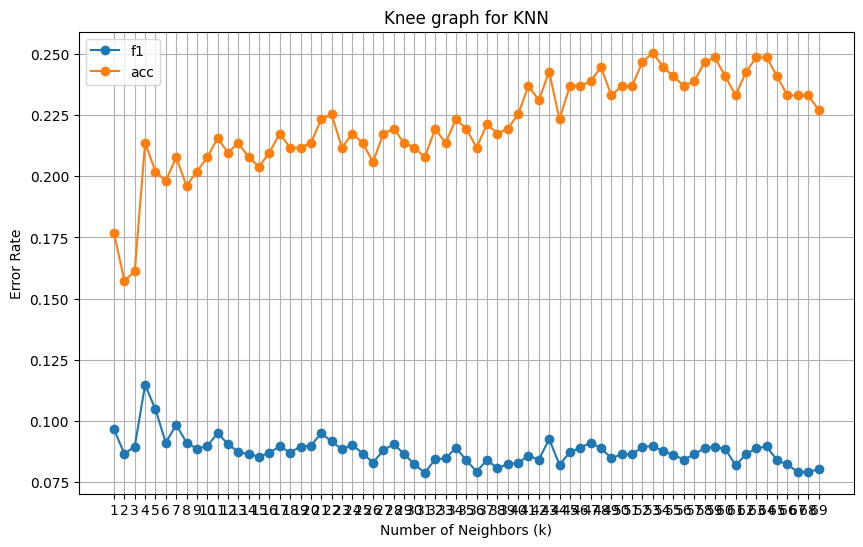

In [409]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score
k_values = np.arange(1, 70)

# Calculate error rates for each value of k
f1_rates = []
acc_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    f1_rates.append(f1_score(y_val, knn.predict(X_val),average='macro'))
    acc_rates.append(accuracy_score(y_val,knn.predict(X_val)))
# Plot the knee graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_rates,label="f1", marker='o', linestyle='-')
plt.plot(k_values, acc_rates,label="acc", marker='o', linestyle='-')
plt.legend()
plt.title('Knee graph for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [410]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [411]:
from sklearn.metrics import accuracy_score,f1_score

y_pred = model.predict(X_train)

print(f"Train Acc {accuracy_score(y_train,y_pred)}")
print(f"Train F1 {f1_score(y_train,y_pred,average='macro')}")

y_pred = model.predict(X_val)

print(f"Val Acc {accuracy_score(y_val,y_pred)}")
print(f"Val F1 {f1_score(y_val,y_pred,average='macro')}")



Train Acc 0.4410621761658031
Train F1 0.3042912327754431
Val Acc 0.21359223300970873
Val F1 0.114784125539301


In [413]:
from sklearn.svm import SVC
for kernel in ['poly', 'rbf', 'sigmoid']:
    model = SVC(kernel=kernel)
    print(kernel)
    model.fit(X,y)
    y_pred = model.predict(X)

    print(f"Train Acc {accuracy_score(y,y_pred)}")
    print(f"Train F1 {f1_score(y,y_pred,average='macro')}")

    print('-'*50)
    

poly
Train Acc 0.2578921806702283
Train F1 0.041003861003861004
--------------------------------------------------
rbf
Train Acc 0.2627489072365226
Train F1 0.056396969789993215
--------------------------------------------------
sigmoid
Train Acc 0.20349684312773192
Train F1 0.0764682902093701
--------------------------------------------------


In [414]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000,max_depth=6)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=1000)

In [415]:
y_pred = model.predict(X_train)

print(f"Train Acc {accuracy_score(y_train,y_pred)}")
print(f"Train F1 {f1_score(y_train,y_pred,average='macro')}")

y_pred = model.predict(X_val)

print(f"Val Acc {accuracy_score(y_val,y_pred)}")
print(f"Val F1 {f1_score(y_val,y_pred,average='macro')}")

Train Acc 0.9125647668393783
Train F1 0.4895309636261779
Val Acc 0.9184466019417475
Val F1 0.4783828001393644


In [416]:
model = KNeighborsClassifier(n_neighbors=22)
model.fit(X,y)
y_pred = model.predict(X_train)

print(f"Train Acc {accuracy_score(y_train,y_pred)}")
print(f"Train F1 {f1_score(y_train,y_pred,average='macro')}")

Train Acc 0.3231865284974093
Train F1 0.16070185780814447


In [417]:
prediction = model.predict(test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Education


In [ ]:
len(prediction)

1374

In [ ]:
labels = target_encoder.inverse_transform(prediction)
labels

array(['Post Graduate', 'Graduate', 'Graduate', ..., 'Graduate',
       'Graduate', 'Post Graduate'], dtype=object)

In [ ]:
sub = pd.DataFrame({'Education':labels})
sub.index = pd.RangeIndex(start=0, stop=len(labels), step=1)
sub.index.name = 'ID'

In [418]:
sub

,Education
ID,
0,Post Graduate
1,Graduate
2,Graduate
3,Post Graduate
4,Graduate
...,...
1369,Graduate
1370,10th Pass
1371,Graduate


In [419]:
sub.to_csv('predictions.csv')